<a href="https://colab.research.google.com/github/kpascoalino/ciencia_de_dados/blob/main/Avalia%C3%A7%C3%A3o_Halloween.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AQUISIÇÃO DOS DADOS

Importação dos pacotes e bibliotecas.

In [88]:
import pandas as pd
from sklearn import preprocessing
from unicodedata import normalize
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.corpus import mac_morpho
from nltk.tag import UnigramTagger
from nltk.probability import FreqDist
from nltk.sem.drt import DrtFunctionVariableExpression
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('mac_morpho')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Package mac_morpho is already up-to-date!


Importação do arquivo csv proveniente do formulário de avaliação do evento para participação com as crianças;

Salvamento do arquivo para um dataframe pandas.

In [89]:
df = pd.read_csv('/content/AVALIAÇÃO HALLOWEEN_2023_CRIANÇAS.csv')

# ANÁLISE EXPLORATÓRIA E TRATAMENTO DOS DADOS

Inspeção inical do dataframe.

In [90]:
df.head()

,Carimbo de data/hora,Digite seu nome completo.,"Você se cadastrou previamente, para o evento, através do formulário enviado via WhatsApp?",Por quantas crianças/adolescentes você foi responsável?,"Se você reside em Atibaia, mas, não reside no Jardim Maristela, em qual bairro reside?","Se você não reside em Atibaia, em qual cidade reside?",Como você ficou sabendo do evento?,Sobre a qualidade das informações passadas.,Sobre a eficácia do meio de comunicação utilizado (grupo do WhatsApp).,Sobre a divisão das crianças/adolescentes em grupos.,...,Sobre a designação de um ou mais responsáveis por cada um dos grupos.,Sobre a atuação dos responsáveis pelos grupos.,Sobre a interação entre os responsáveis pelos pontos de distribuição de doces e as crianças/adolescentes.,Sobre o formulário de cadastro para a participação no evento.,Sobre a segurança durante a caminhada e ao longo do evento.,Sobre a organização do evento de forma geral.,"Foi apresentada uma sugestão para que, em 2024, de forma semelhante ao que ocorre no Parque dos Coqueiros, fizéssemos um circuito, como uma espécie de túnel do terror, mas, de forma aberta.\nNeste caso, em nenhuma casa seriam ofertados cenários diferenciados, ou, atrações.\nQual sua opinião sobre a sugestão acima?","Sobre o horário de início para o evento, qual é a sua sugestão?","Sobre o horário de término para o evento, qual é a sua sugestão?","Deixe aqui, se quiser, sua crítica, elogio ou sugestão."
0,2023/10/29 9:43:56 PM GMT-3,Bianca Perez Correa,Sim,1,Jd Estância Brasil,NaN,"Sou de outro bairro, ou, cidade e fui convidad...",5,5,5,...,4,4,5,4,4,5,Concordo desde que ainda seja possível ir até ...,18:00,19:30,Primeiramente gostaria de agradecer por todo ...
1,2023/10/29 9:48:46 PM GMT-3,Ágatha Tomoko Sakata Fonseca,Sim,1,Jardim Santa Bárbara.,NaN,"Sou de outro bairro, ou, cidade e fui convidad...",5,5,5,...,5,5,3,3,4,4,"Não concordo, pois, acredito que a caminhada p...",18:00,20:00,"A organização do evento foi ótima, porém as c..."
2,2023/10/29 9:48:51 PM GMT-3,Andressa Amaral,Sim,1,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",4,5,5,...,5,3,5,5,4,5,"Não concordo, pois, acredito que a caminhada p...",17:00,20:00,NaN
3,2023/10/29 9:50:18 PM GMT-3,Sueli Pinheiro da rosa,Sim,1,Jardim das Flores,NaN,"Pelo grupo do bairro, ou, grupos semelhantes d...",4,4,5,...,2,2,2,5,4,3,Para mim é indiferente.,18:00,22:00,"Gostei da festa, porém a pessoa que estava res..."
4,2023/10/29 9:52:03 PM GMT-3,Aline Cotta Henriques Peres,Sim,1,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",5,5,5,...,4,4,5,5,4,5,Concordo e acredito que não seja necessário a ...,18:00,20:00,NaN


In [91]:
df.columns

Index(['Carimbo de data/hora', 'Digite seu nome completo.',
       'Você se cadastrou previamente, para o evento, através do formulário enviado via WhatsApp?',
       'Por quantas crianças/adolescentes você foi responsável?',
       'Se você reside em Atibaia, mas, não reside no Jardim Maristela, em qual bairro reside?',
       'Se você não reside em Atibaia, em qual cidade reside?',
       'Como você ficou sabendo do evento?',
       'Sobre a qualidade das informações passadas.',
       'Sobre a eficácia do meio de comunicação utilizado (grupo do WhatsApp).',
       'Sobre a divisão das crianças/adolescentes em grupos.',
       'Sobre as localizações dos pontos de encontro.',
       'Sobre as localizações das casas cadastradas (pontos de distribuição dos doces).',
       'Sobre a distância percorrida para alcançar as casas cadastradas.',
       'Sobre a designação de um ou mais responsáveis por cada um dos grupos.',
       'Sobre a atuação dos responsáveis pelos grupos.',
       'Sobr

Renomeando as colunas, de acordo com as melhores práticas.

In [92]:
col = {'Carimbo de data/hora': 'Data_Hora', 'Digite seu nome completo.': 'Nome',
       'Você se cadastrou previamente, para o evento, através do formulário enviado via WhatsApp?': 'Cadastro_Previo',
       'Por quantas crianças/adolescentes você foi responsável?': 'Qtde_Criancas',
       'Se você reside em Atibaia, mas, não reside no Jardim Maristela, em qual bairro reside?': 'Bairro',
       'Se você não reside em Atibaia, em qual cidade reside?': 'Cidade', 'Como você ficou sabendo do evento?': 'Conhecimento_Evento',
       'Sobre a qualidade das informações passadas.': 'Qualidade_Informacoes',
       'Sobre a eficácia do meio de comunicação utilizado (grupo do WhatsApp).': 'Meio_Comun',
       'Sobre a divisão das crianças/adolescentes em grupos.': 'Div_Grupos', 'Sobre as localizações dos pontos de encontro.': 'Loc_Pts_Encontro',
       'Sobre as localizações das casas cadastradas (pontos de distribuição dos doces).': 'Loc_Casas',
       'Sobre a distância percorrida para alcançar as casas cadastradas.': 'Dist_Casas',
       'Sobre a designação de um ou mais responsáveis por cada um dos grupos.': 'Desig_Resp_Grupo',
       'Sobre a atuação dos responsáveis pelos grupos.': 'Atua_Resp_Grupo',
       'Sobre a interação entre os responsáveis pelos pontos de distribuição de doces e as crianças/adolescentes.': 'Inter_Casa_Grupo',
       'Sobre o formulário de cadastro para a participação no evento.': 'Form_Cadastro',
       'Sobre a segurança durante a caminhada e ao longo do evento.': 'Seguranca', 'Sobre a organização do evento de forma geral.': 'Organizacao',
       'Foi apresentada uma sugestão para que, em 2024, de forma semelhante ao que ocorre no Parque dos Coqueiros, fizéssemos um circuito, como uma espécie de túnel do terror, mas, de forma aberta.\nNeste caso, em nenhuma casa seriam ofertados cenários diferenciados, ou, atrações.\nQual sua opinião sobre a sugestão acima?': 'Prop_Ano_Seguinte',
       'Sobre o horário de início para o evento, qual é a sua sugestão?': 'Sugest_Hora_Inicio',
       'Sobre o horário de término para o evento, qual é a sua sugestão?': 'Sugest_Hora_Termino',
       'Deixe aqui, se quiser, sua crítica, elogio ou sugestão.': 'Comentarios'}
df = df.rename(columns=col)
df.head()

,Data_Hora,Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
0,2023/10/29 9:43:56 PM GMT-3,Bianca Perez Correa,Sim,1,Jd Estância Brasil,NaN,"Sou de outro bairro, ou, cidade e fui convidad...",5,5,5,...,4,4,5,4,4,5,Concordo desde que ainda seja possível ir até ...,18:00,19:30,Primeiramente gostaria de agradecer por todo ...
1,2023/10/29 9:48:46 PM GMT-3,Ágatha Tomoko Sakata Fonseca,Sim,1,Jardim Santa Bárbara.,NaN,"Sou de outro bairro, ou, cidade e fui convidad...",5,5,5,...,5,5,3,3,4,4,"Não concordo, pois, acredito que a caminhada p...",18:00,20:00,"A organização do evento foi ótima, porém as c..."
2,2023/10/29 9:48:51 PM GMT-3,Andressa Amaral,Sim,1,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",4,5,5,...,5,3,5,5,4,5,"Não concordo, pois, acredito que a caminhada p...",17:00,20:00,NaN
3,2023/10/29 9:50:18 PM GMT-3,Sueli Pinheiro da rosa,Sim,1,Jardim das Flores,NaN,"Pelo grupo do bairro, ou, grupos semelhantes d...",4,4,5,...,2,2,2,5,4,3,Para mim é indiferente.,18:00,22:00,"Gostei da festa, porém a pessoa que estava res..."
4,2023/10/29 9:52:03 PM GMT-3,Aline Cotta Henriques Peres,Sim,1,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",5,5,5,...,4,4,5,5,4,5,Concordo e acredito que não seja necessário a ...,18:00,20:00,NaN


In [93]:
df.dtypes

Data_Hora                object
Nome                     object
Cadastro_Previo          object
Qtde_Criancas            object
Bairro                   object
Cidade                   object
Conhecimento_Evento      object
Qualidade_Informacoes     int64
Meio_Comun                int64
Div_Grupos                int64
Loc_Pts_Encontro          int64
Loc_Casas                 int64
Dist_Casas                int64
Desig_Resp_Grupo          int64
Atua_Resp_Grupo           int64
Inter_Casa_Grupo          int64
Form_Cadastro             int64
Seguranca                 int64
Organizacao               int64
Prop_Ano_Seguinte        object
Sugest_Hora_Inicio       object
Sugest_Hora_Termino      object
Comentarios              object
dtype: object

Deletando a coluna com informações de data e hora do preenchimento do formulário.

In [94]:
df.drop(columns=['Data_Hora'], inplace=True)
df.head()

,Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,Loc_Pts_Encontro,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
0,Bianca Perez Correa,Sim,1,Jd Estância Brasil,NaN,"Sou de outro bairro, ou, cidade e fui convidad...",5,5,5,4,...,4,4,5,4,4,5,Concordo desde que ainda seja possível ir até ...,18:00,19:30,Primeiramente gostaria de agradecer por todo ...
1,Ágatha Tomoko Sakata Fonseca,Sim,1,Jardim Santa Bárbara.,NaN,"Sou de outro bairro, ou, cidade e fui convidad...",5,5,5,2,...,5,5,3,3,4,4,"Não concordo, pois, acredito que a caminhada p...",18:00,20:00,"A organização do evento foi ótima, porém as c..."
2,Andressa Amaral,Sim,1,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",4,5,5,5,...,5,3,5,5,4,5,"Não concordo, pois, acredito que a caminhada p...",17:00,20:00,NaN
3,Sueli Pinheiro da rosa,Sim,1,Jardim das Flores,NaN,"Pelo grupo do bairro, ou, grupos semelhantes d...",4,4,5,2,...,2,2,2,5,4,3,Para mim é indiferente.,18:00,22:00,"Gostei da festa, porém a pessoa que estava res..."
4,Aline Cotta Henriques Peres,Sim,1,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",5,5,5,5,...,4,4,5,5,4,5,Concordo e acredito que não seja necessário a ...,18:00,20:00,NaN


Tratando os valores instanciados na coluna Nome e verificando valores duplicados;

Tratando valores duplicados.

In [95]:
df['Nome'] = df['Nome'].apply(lambda x: x.title().strip())
df['Nome'] = df['Nome'].apply(lambda x: normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII'))
print('Nomes duplicados: ', df.duplicated(subset = ['Nome']).sum())
df.head()

Nomes duplicados:  3


,Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,Loc_Pts_Encontro,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
0,Bianca Perez Correa,Sim,1,Jd Estância Brasil,NaN,"Sou de outro bairro, ou, cidade e fui convidad...",5,5,5,4,...,4,4,5,4,4,5,Concordo desde que ainda seja possível ir até ...,18:00,19:30,Primeiramente gostaria de agradecer por todo ...
1,Agatha Tomoko Sakata Fonseca,Sim,1,Jardim Santa Bárbara.,NaN,"Sou de outro bairro, ou, cidade e fui convidad...",5,5,5,2,...,5,5,3,3,4,4,"Não concordo, pois, acredito que a caminhada p...",18:00,20:00,"A organização do evento foi ótima, porém as c..."
2,Andressa Amaral,Sim,1,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",4,5,5,5,...,5,3,5,5,4,5,"Não concordo, pois, acredito que a caminhada p...",17:00,20:00,NaN
3,Sueli Pinheiro Da Rosa,Sim,1,Jardim das Flores,NaN,"Pelo grupo do bairro, ou, grupos semelhantes d...",4,4,5,2,...,2,2,2,5,4,3,Para mim é indiferente.,18:00,22:00,"Gostei da festa, porém a pessoa que estava res..."
4,Aline Cotta Henriques Peres,Sim,1,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",5,5,5,5,...,4,4,5,5,4,5,Concordo e acredito que não seja necessário a ...,18:00,20:00,NaN


In [96]:
df[df.duplicated(subset = ['Nome'])]

,Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,Loc_Pts_Encontro,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
19,Renata,Sim,1,Vila Thais,-,"Pelo grupo do bairro, ou, grupos semelhantes d...",4,5,4,5,...,4,4,4,4,4,5,Concordo desde que ainda seja possível ir até ...,18:30,19:30,"Acho que a rota deve ser melhor definida, no g..."
21,Taiz Cristina De Mattos Alcantara,Sim,4,NaN,NaN,Fui convidado por outra pessoa que também não ...,4,5,2,4,...,5,2,5,5,5,5,"Não concordo, pois, acredito que a caminhada p...",18:30,21:00,Experiência incrível para os meus filhos amei!!!
39,Marta M Ferreira,Sim,ESTIVE COMO APOIO AO GRUPO 3,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",5,5,4,4,...,4,4,4,4,4,5,Concordo e acredito que não seja necessário a ...,18:00,21:00,Primeiramente gostaria de elogiar a todos envo...


In [97]:
df[df['Nome'] == 'Taiz Cristina De Mattos Alcantara']

,Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,Loc_Pts_Encontro,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
20,Taiz Cristina De Mattos Alcantara,Sim,4,NaN,NaN,Fui convidado por outra pessoa que também não ...,4,5,2,5,...,5,2,5,5,5,5,"Não concordo, pois, acredito que a caminhada p...",18:30,21:00,Foi uma experiência incrível na vida dos meus ...
21,Taiz Cristina De Mattos Alcantara,Sim,4,NaN,NaN,Fui convidado por outra pessoa que também não ...,4,5,2,4,...,5,2,5,5,5,5,"Não concordo, pois, acredito que a caminhada p...",18:30,21:00,Experiência incrível para os meus filhos amei!!!


In [98]:
df.drop([20], axis=0, inplace=True)

In [99]:
df[df['Nome'] == 'Renata']

,Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,Loc_Pts_Encontro,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
7,Renata,Sim,2,Maristela,ATIBAIA,"Já estava no grupo do WhatsApp do evento, desd...",5,5,5,5,...,5,5,5,5,4,5,Concordo desde que ainda seja possível ir até ...,18:00,22:00,"Foi tudo perfeito, sobre a segurança:abri um p..."
19,Renata,Sim,1,Vila Thais,-,"Pelo grupo do bairro, ou, grupos semelhantes d...",4,5,4,5,...,4,4,4,4,4,5,Concordo desde que ainda seja possível ir até ...,18:30,19:30,"Acho que a rota deve ser melhor definida, no g..."


In [100]:
df.loc[7,'Nome'] = 'Renata Maristela'
df.loc[19,'Nome'] = 'Renata Thais'

In [101]:
df[df['Nome'] == 'Marta M Ferreira']

,Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,Loc_Pts_Encontro,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
35,Marta M Ferreira,Sim,Ajudei como apoio o grupo 3,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",5,5,5,5,...,4,4,4,5,4,5,Concordo e acredito que não seja necessário a ...,18:00,21:00,Primeiramente elogiar que foi bem oranizado e ...
39,Marta M Ferreira,Sim,ESTIVE COMO APOIO AO GRUPO 3,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",5,5,4,4,...,4,4,4,4,4,5,Concordo e acredito que não seja necessário a ...,18:00,21:00,Primeiramente gostaria de elogiar a todos envo...


In [102]:
df.drop([35], axis=0, inplace=True)

In [103]:
df[df.duplicated(subset = ['Nome'])]

,Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,Loc_Pts_Encontro,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios


Criando um código para substituir a identificação via nome e preservar dados sensíveis.

In [104]:
df.insert(loc = 1, column = 'Id_Nome', value = '')
label_encoder = preprocessing.LabelEncoder()
df['Id_Nome']= label_encoder.fit_transform(df['Nome'])
df.head()

,Nome,Id_Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
0,Bianca Perez Correa,10,Sim,1,Jd Estância Brasil,NaN,"Sou de outro bairro, ou, cidade e fui convidad...",5,5,5,...,4,4,5,4,4,5,Concordo desde que ainda seja possível ir até ...,18:00,19:30,Primeiramente gostaria de agradecer por todo ...
1,Agatha Tomoko Sakata Fonseca,0,Sim,1,Jardim Santa Bárbara.,NaN,"Sou de outro bairro, ou, cidade e fui convidad...",5,5,5,...,5,5,3,3,4,4,"Não concordo, pois, acredito que a caminhada p...",18:00,20:00,"A organização do evento foi ótima, porém as c..."
2,Andressa Amaral,6,Sim,1,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",4,5,5,...,5,3,5,5,4,5,"Não concordo, pois, acredito que a caminhada p...",17:00,20:00,NaN
3,Sueli Pinheiro Da Rosa,51,Sim,1,Jardim das Flores,NaN,"Pelo grupo do bairro, ou, grupos semelhantes d...",4,4,5,...,2,2,2,5,4,3,Para mim é indiferente.,18:00,22:00,"Gostei da festa, porém a pessoa que estava res..."
4,Aline Cotta Henriques Peres,2,Sim,1,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",5,5,5,...,4,4,5,5,4,5,Concordo e acredito que não seja necessário a ...,18:00,20:00,NaN


In [105]:
print('Id_Nomes duplicados: ', df.duplicated(subset = ['Id_Nome']).sum())
df['Id_Nome'].describe()

Id_Nomes duplicados:  0


count    61.000000
mean     30.000000
std      17.752934
min       0.000000
25%      15.000000
50%      30.000000
75%      45.000000
max      60.000000
Name: Id_Nome, dtype: float64

In [106]:
df.drop(columns=['Nome'], inplace=True)
df.head()

,Id_Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,Loc_Pts_Encontro,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
0,10,Sim,1,Jd Estância Brasil,NaN,"Sou de outro bairro, ou, cidade e fui convidad...",5,5,5,4,...,4,4,5,4,4,5,Concordo desde que ainda seja possível ir até ...,18:00,19:30,Primeiramente gostaria de agradecer por todo ...
1,0,Sim,1,Jardim Santa Bárbara.,NaN,"Sou de outro bairro, ou, cidade e fui convidad...",5,5,5,2,...,5,5,3,3,4,4,"Não concordo, pois, acredito que a caminhada p...",18:00,20:00,"A organização do evento foi ótima, porém as c..."
2,6,Sim,1,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",4,5,5,5,...,5,3,5,5,4,5,"Não concordo, pois, acredito que a caminhada p...",17:00,20:00,NaN
3,51,Sim,1,Jardim das Flores,NaN,"Pelo grupo do bairro, ou, grupos semelhantes d...",4,4,5,2,...,2,2,2,5,4,3,Para mim é indiferente.,18:00,22:00,"Gostei da festa, porém a pessoa que estava res..."
4,2,Sim,1,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",5,5,5,5,...,4,4,5,5,4,5,Concordo e acredito que não seja necessário a ...,18:00,20:00,NaN


Inspecionando os valores instanciados na coluna Cadastro_Previo.

In [107]:
df['Cadastro_Previo'].describe()

count      61
unique      2
top       Sim
freq       57
Name: Cadastro_Previo, dtype: object

In [108]:
df['Cadastro_Previo'].value_counts()

Sim    57
Não     4
Name: Cadastro_Previo, dtype: int64

Inspecionando os valores instanciados na coluna Qtde_Criancas.

In [109]:
df['Qtde_Criancas'].describe()

count     61
unique     9
top        1
freq      23
Name: Qtde_Criancas, dtype: object

In [110]:
df['Qtde_Criancas'].value_counts()

1                                23
2                                17
3                                 7
5                                 6
4                                 4
7                                 1
ESTIVE COMO APOIO AO GRUPO 3      1
Nenhuma                           1
8                                 1
Name: Qtde_Criancas, dtype: int64

In [111]:
df[df['Qtde_Criancas'] == 'ESTIVE COMO APOIO AO GRUPO 3 ']

,Id_Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,Loc_Pts_Encontro,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
39,34,Sim,ESTIVE COMO APOIO AO GRUPO 3,NaN,NaN,"Já estava no grupo do WhatsApp do evento, desd...",5,5,4,4,...,4,4,4,4,4,5,Concordo e acredito que não seja necessário a ...,18:00,21:00,Primeiramente gostaria de elogiar a todos envo...


In [112]:
df[df['Qtde_Criancas'] == 'Nenhuma ']

,Id_Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,Loc_Pts_Encontro,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
49,38,Não,Nenhuma,NaN,NaN,Moro no bairro jd maristela,5,5,5,5,...,5,5,5,5,5,5,"Não concordo, pois, acredito que a caminhada p...",17:00,22:00,NaN


In [113]:
#assumindo que as pessoas que indicaram algo diferente de um número plausível na quantidade de crianças que acompanhou como responsável
#eram coordenadores/responsáveis por grupos, sem crianças próprias
df.loc[39, 'Qtde_Criancas'] = 0
df.loc[49, 'Qtde_Criancas'] = 0

In [114]:
df['Qtde_Criancas'] = df['Qtde_Criancas'].astype(int)

In [115]:
df['Qtde_Criancas'].describe()

count    61.000000
mean      2.278689
std       1.654601
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       8.000000
Name: Qtde_Criancas, dtype: float64

In [116]:
df['Qtde_Criancas'].sum()

139

Inspecionando os valores instanciados na coluna Bairro.

In [117]:
df['Bairro'] = df['Bairro'].fillna('Jardim Maristela')

In [118]:
df['Bairro'] = df['Bairro'].astype(str)

In [119]:
df['Bairro'] = df['Bairro'].apply(lambda x: x.title().strip())
df['Bairro'] = df['Bairro'].apply(lambda x: normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII'))

In [120]:
df['Bairro'].value_counts()

Jardim Maristela                                          36
Retiro Das Fontes                                          4
Jardim Paulista                                            2
Jd Estancia Brasil                                         1
Vila Giglio                                                1
Jardim Jaragua                                             1
Jd Maristela                                               1
Jardim Floresta                                            1
Resido No Jd Maristela                                     1
Itapetinga/ Vila Nova Gardenia                             1
Jd Jaragua                                                 1
Resido No Maristela I                                      1
Jardim Santa Barbara.                                      1
Maristela1                                                 1
Vila Thais                                                 1
Alvinopolis                                                1
Campos De Atibaia       

In [121]:
df['Bairro'] = df['Bairro'].apply(lambda x: x.replace('Jd','Jardim') if ('jd' in x.lower()) else x)
df['Bairro'].sort_values().value_counts(sort=False)

Alvinopolis                                                1
Campos De Atibaia                                          1
Cerejeiras                                                 1
Itapetinga/ Vila Nova Gardenia                             1
Jardim Das Flores                                          1
Jardim Estancia Brasil                                     1
Jardim Floresta                                            1
Jardim Jaragua                                             2
Jardim Maristela                                          37
Jardim Pailista                                            1
Jardim Paulista                                            2
Jardim Santa Barbara.                                      1
Maristela                                                  1
Maristela1                                                 1
Resido No Jardim Maristela                                 1
Resido No Maristela I                                      1
Retiro Das Fontes       

In [122]:
df['Bairro'] = df['Bairro'].apply(lambda x: x.replace('.','') if ('.' in x.lower()) else x)
df['Bairro'] = df['Bairro'].apply(lambda x: x.replace(x,'Perdoes') if ('antiga' in x.lower()) else x)
df['Bairro'] = df['Bairro'].apply(lambda x: x.replace(x,'Jardim Maristela') if ('maristela' in x.lower()) else x)
df['Bairro'] = df['Bairro'].apply(lambda x: x.replace(x,'Jardim Paulista') if ('pailista' in x.lower()) else x)
df['Bairro'] = df['Bairro'].apply(lambda x: x.replace(x,'Itapetinga') if ('itapetinga' in x.lower()) else x)
df['Bairro'].sort_values().value_counts(sort=False)

Alvinopolis                1
Campos De Atibaia          1
Cerejeiras                 1
Itapetinga                 1
Jardim Das Flores          1
Jardim Estancia Brasil     1
Jardim Floresta            1
Jardim Jaragua             2
Jardim Maristela          41
Jardim Paulista            3
Jardim Santa Barbara       1
Perdoes                    1
Retiro Das Fontes          4
Vila Giglio                1
Vila Thais                 1
Name: Bairro, dtype: int64

Inspecionando os valores instanciados na coluna Cidade.

In [123]:
df['Cidade'] = df['Cidade'].fillna('Atibaia')
df['Cidade'] = df['Cidade'].astype(str)

In [124]:
df['Cidade'] = df['Cidade'].apply(lambda x: x.title().strip())
df['Cidade'] = df['Cidade'].apply(lambda x: normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII'))

In [125]:
df['Cidade'].sort_values().value_counts(sort=False)

-           1
Atibaia    59
Perdoes     1
Name: Cidade, dtype: int64

In [126]:
df['Cidade'] = df['Cidade'].apply(lambda x: x.replace('-','Atibaia') if ('-' in x.lower()) else x)
df['Cidade'].sort_values().value_counts(sort=False)

Atibaia    60
Perdoes     1
Name: Cidade, dtype: int64

In [127]:
df['Cidade'] = df['Cidade'].apply(lambda x: x.replace('Perdoes','Bom Jesus dos Perdoes'))
df['Cidade'].sort_values().value_counts(sort=False)

Atibaia                  60
Bom Jesus dos Perdoes     1
Name: Cidade, dtype: int64

In [128]:
df.insert(loc = 5, column = 'Bairro_Cidade', value = '')
df['Bairro_Cidade'] = df['Bairro'] + ', ' + df['Cidade']
df['Bairro_Cidade'].sort_values().value_counts(sort=False)

Alvinopolis, Atibaia                1
Campos De Atibaia, Atibaia          1
Cerejeiras, Atibaia                 1
Itapetinga, Atibaia                 1
Jardim Das Flores, Atibaia          1
Jardim Estancia Brasil, Atibaia     1
Jardim Floresta, Atibaia            1
Jardim Jaragua, Atibaia             2
Jardim Maristela, Atibaia          41
Jardim Paulista, Atibaia            3
Jardim Santa Barbara, Atibaia       1
Perdoes, Bom Jesus dos Perdoes      1
Retiro Das Fontes, Atibaia          4
Vila Giglio, Atibaia                1
Vila Thais, Atibaia                 1
Name: Bairro_Cidade, dtype: int64

Inspecionando os valores instanciados na coluna Conhecimento_Evento.

In [129]:
df['Conhecimento_Evento'].sort_values().value_counts(sort=False)

Amigo                                                                                   1
Eu morei no Jd Maristela e participo dos grupos do bairro.                              1
Fui convidado pelo meu vizinho                                                          1
Fui convidado por outra pessoa que também não reside no Jardim Maristela.               2
Já estava no grupo do WhatsApp do evento, desde o ano passado.                         30
Moro no bairro jd maristela                                                             1
Mudei para atibaia este ano e fui adicionada ao grupo na festa junina.                  1
Pelo grupo do bairro, ou, grupos semelhantes do Jardim Maristela.                      14
Sou de outro bairro, ou, cidade e fui convidado por um morador do Jardim Maristela.     9
Vizinho                                                                                 1
Name: Conhecimento_Evento, dtype: int64

As opções pré cadastradas eram:

Já estava no grupo do WhatsApp do evento, desde o ano passado.

Pelo grupo do bairro, ou, grupos semelhantes do Jardim Maristela.

Sou de outro bairro, ou, cidade e fui convidado por um morador do Jardim Maristela.

Fui convidado por outra pessoa que também não reside no Jardim Maristela.

Havia também a opção outros. Algumas pessoas a escolheram e escreveram respostas relativamente cíclicas, por este motivo, adequaremos.

In [130]:
df[df['Conhecimento_Evento']=='Eu morei no Jd Maristela e participo dos grupos do bairro.']

,Id_Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Bairro_Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
12,18,Sim,1,Campos De Atibaia,Atibaia,"Campos De Atibaia, Atibaia",Eu morei no Jd Maristela e participo dos grupo...,5,5,5,...,5,5,5,5,3,5,Para mim é indiferente.,18:00,20:00,NaN


In [131]:
df.loc[12, 'Conhecimento_Evento'] = 'Pelo grupo do bairro, ou, grupos semelhantes do Jardim Maristela.'

In [132]:
df[df['Conhecimento_Evento']=='Fui convidado pelo meu vizinho']

,Id_Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Bairro_Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
16,25,Sim,1,Jardim Maristela,Atibaia,"Jardim Maristela, Atibaia",Fui convidado pelo meu vizinho,5,5,5,...,3,5,5,5,5,5,Concordo e acredito que não seja necessário a ...,17:00,22:00,NaN


In [133]:
df.loc[16, 'Conhecimento_Evento'] = 'Sou de outro bairro, ou, cidade e fui convidado por um morador do Jardim Maristela.'

In [134]:
df[df['Conhecimento_Evento']=='Moro no bairro jd maristela ']

,Id_Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Bairro_Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
49,38,Não,0,Jardim Maristela,Atibaia,"Jardim Maristela, Atibaia",Moro no bairro jd maristela,5,5,5,...,5,5,5,5,5,5,"Não concordo, pois, acredito que a caminhada p...",17:00,22:00,NaN


In [135]:
df.loc[49, 'Conhecimento_Evento'] = 'Pelo grupo do bairro, ou, grupos semelhantes do Jardim Maristela.'

In [136]:
df[df['Conhecimento_Evento']=='Mudei para atibaia este ano e fui adicionada ao grupo na festa junina.']

,Id_Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Bairro_Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
46,37,Sim,1,Jardim Maristela,Atibaia,"Jardim Maristela, Atibaia",Mudei para atibaia este ano e fui adicionada a...,5,5,5,...,5,5,5,5,4,5,"Não concordo, pois, acredito que a caminhada p...",06:06,09:00,Parabéns aos organizadores. Foi meu primeiro H...


In [137]:
df.loc[46, 'Conhecimento_Evento'] = 'Já estava no grupo do WhatsApp do evento, desde o ano passado.'

In [138]:
df[df['Conhecimento_Evento']=='Vizinho ']

,Id_Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Bairro_Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
54,57,Não,2,Retiro Das Fontes,Atibaia,"Retiro Das Fontes, Atibaia",Vizinho,4,5,5,...,5,5,5,5,5,5,"Não concordo, pois, acredito que a caminhada p...",18:21,21:00,Evento muito bem organizado!


In [139]:
df.loc[54, 'Conhecimento_Evento'] = 'Fui convidado por outra pessoa que também não reside no Jardim Maristela.'

In [140]:
df[df['Conhecimento_Evento']=='Amigo']

,Id_Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Bairro_Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
40,35,Sim,1,Retiro Das Fontes,Atibaia,"Retiro Das Fontes, Atibaia",Amigo,5,5,5,...,5,5,5,5,5,5,Concordo e acredito que não seja necessário a ...,06:00,21:00,NaN


In [141]:
df.loc[40, 'Conhecimento_Evento'] = 'Sou de outro bairro, ou, cidade e fui convidado por um morador do Jardim Maristela.'

In [142]:
df['Conhecimento_Evento'].sort_values().value_counts(sort=False)

Fui convidado por outra pessoa que também não reside no Jardim Maristela.               3
Já estava no grupo do WhatsApp do evento, desde o ano passado.                         31
Pelo grupo do bairro, ou, grupos semelhantes do Jardim Maristela.                      16
Sou de outro bairro, ou, cidade e fui convidado por um morador do Jardim Maristela.    11
Name: Conhecimento_Evento, dtype: int64

Inspecionando os valores instanciados nas colunas de avaliação do evento.

In [143]:
df.dtypes

Id_Nome                   int64
Cadastro_Previo          object
Qtde_Criancas             int64
Bairro                   object
Cidade                   object
Bairro_Cidade            object
Conhecimento_Evento      object
Qualidade_Informacoes     int64
Meio_Comun                int64
Div_Grupos                int64
Loc_Pts_Encontro          int64
Loc_Casas                 int64
Dist_Casas                int64
Desig_Resp_Grupo          int64
Atua_Resp_Grupo           int64
Inter_Casa_Grupo          int64
Form_Cadastro             int64
Seguranca                 int64
Organizacao               int64
Prop_Ano_Seguinte        object
Sugest_Hora_Inicio       object
Sugest_Hora_Termino      object
Comentarios              object
dtype: object

In [144]:
df['Qualidade_Informacoes'].describe()

count    61.000000
mean      4.754098
std       0.649506
min       1.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Qualidade_Informacoes, dtype: float64

In [145]:
df['Meio_Comun'].describe()

count    61.000000
mean      4.852459
std       0.401500
min       3.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Meio_Comun, dtype: float64

In [146]:
df['Div_Grupos'].describe()

count    61.000000
mean      4.622951
std       0.734028
min       2.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Div_Grupos, dtype: float64

In [147]:
df['Loc_Pts_Encontro'].describe()

count    61.000000
mean      4.639344
std       0.707879
min       2.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Loc_Pts_Encontro, dtype: float64

In [148]:
df['Loc_Casas'].describe()

count    61.000000
mean      4.229508
std       0.937967
min       2.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Loc_Casas, dtype: float64

In [149]:
df['Dist_Casas'].describe()

count    61.000000
mean      3.622951
std       1.267069
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Dist_Casas, dtype: float64

In [150]:
df['Desig_Resp_Grupo'].describe()

count    61.000000
mean      4.475410
std       0.905659
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Desig_Resp_Grupo, dtype: float64

In [151]:
df['Atua_Resp_Grupo'].describe()

count    61.000000
mean      4.426230
std       0.921213
min       2.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Atua_Resp_Grupo, dtype: float64

In [152]:
df['Inter_Casa_Grupo'].describe()

count    61.000000
mean      4.688525
std       0.719745
min       2.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Inter_Casa_Grupo, dtype: float64

In [153]:
df['Form_Cadastro'].describe()

count    61.000000
mean      4.786885
std       0.486989
min       3.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Form_Cadastro, dtype: float64

In [154]:
df['Seguranca'].describe()

count    61.000000
mean      4.409836
std       0.615821
min       3.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Seguranca, dtype: float64

In [155]:
df['Organizacao'].describe()

count    61.000000
mean      4.770492
std       0.461644
min       3.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Organizacao, dtype: float64

Inspecionando os valores instanciados na coluna Prop_Ano_Seguinte.

In [156]:
df['Prop_Ano_Seguinte'].sort_values().value_counts(sort=False)

Concordo desde que ainda seja possível ir até as casas pegar doces, mesmo que estas não disponibilizem mais atrações ou cenários.                              21
Concordo e acredito que não seja necessário a caminhada pelo bairro e que um único kit de doces por criança deva ser entregue no próprio local do circuito.     6
Não concordo, pois, acredito que a caminhada pelo bairro e as atrações ou cenários oferecidos em cada casa, são o formato mais adequado para o evento.         25
Para mim é indiferente.                                                                                                                                         8
Name: Prop_Ano_Seguinte, dtype: int64

No formulário de aquisição de dados, sobre a proposta para o ano seguinte, os usuários escolhiam a melhor resposta as 4 opçõe prontas apresentadas acima. Não havia a possibilidade de resposta aberta, mas a questão não era obrigatória:

In [157]:
df['Prop_Ano_Seguinte'].isnull().sum()

1

In [158]:
df[df['Prop_Ano_Seguinte'].isnull()]

,Id_Nome,Cadastro_Previo,Qtde_Criancas,Bairro,Cidade,Bairro_Cidade,Conhecimento_Evento,Qualidade_Informacoes,Meio_Comun,Div_Grupos,...,Desig_Resp_Grupo,Atua_Resp_Grupo,Inter_Casa_Grupo,Form_Cadastro,Seguranca,Organizacao,Prop_Ano_Seguinte,Sugest_Hora_Inicio,Sugest_Hora_Termino,Comentarios
47,40,Sim,2,Jardim Maristela,Atibaia,"Jardim Maristela, Atibaia","Pelo grupo do bairro, ou, grupos semelhantes d...",5,5,4,...,4,4,5,5,4,5,NaN,18:00,22:00,NaN


In [159]:
df.loc[47, 'Prop_Ano_Seguinte'] = 'Para mim é indiferente.'
df['Prop_Ano_Seguinte'].isnull().sum()

0

Inspecionando e tartando os valores instanciados nas colunas Sugest_Hora_Inicio e Sugest_Hora_Termino.

In [160]:
df['Sugest_Hora_Inicio'].sort_values().value_counts(sort=False)

05:00     1
06:00     4
06:06     1
07:00     1
17:00     5
17:30     1
18:00    38
18:21     1
18:30     6
19:00     2
20:00     1
Name: Sugest_Hora_Inicio, dtype: int64

In [161]:
df['Sugest_Hora_Inicio'] = df['Sugest_Hora_Inicio'].apply(lambda x: x.replace('05:00','17:00'))
df['Sugest_Hora_Inicio'] = df['Sugest_Hora_Inicio'].apply(lambda x: x.replace('06:00','18:00'))
df['Sugest_Hora_Inicio'] = df['Sugest_Hora_Inicio'].apply(lambda x: x.replace('06:06','18:00'))
df['Sugest_Hora_Inicio'] = df['Sugest_Hora_Inicio'].apply(lambda x: x.replace('07:00','19:00'))
df['Sugest_Hora_Inicio'] = df['Sugest_Hora_Inicio'].apply(lambda x: x.replace('18:21','18:30'))
df['Sugest_Hora_Inicio'].sort_values().value_counts(sort=False)

17:00     6
17:30     1
18:00    43
18:30     7
19:00     3
20:00     1
Name: Sugest_Hora_Inicio, dtype: int64

In [162]:
df['Sugest_Hora_Termino'].sort_values().value_counts(sort=False)

08:00     1
08:30     1
09:00     1
10:00     2
19:30     3
20:00    13
20:30     3
21:00    18
21:30     2
22:00    16
23:30     1
Name: Sugest_Hora_Termino, dtype: int64

In [163]:
df['Sugest_Hora_Termino'] = df['Sugest_Hora_Termino'].apply(lambda x: x.replace('08:00','20:00'))
df['Sugest_Hora_Termino'] = df['Sugest_Hora_Termino'].apply(lambda x: x.replace('08:30','20:30'))
df['Sugest_Hora_Termino'] = df['Sugest_Hora_Termino'].apply(lambda x: x.replace('10:00','22:00'))
df['Sugest_Hora_Termino'] = df['Sugest_Hora_Termino'].apply(lambda x: x.replace('09:00','21:00'))
df['Sugest_Hora_Termino'].sort_values().value_counts(sort=False)

19:30     3
20:00    14
20:30     4
21:00    19
21:30     2
22:00    18
23:30     1
Name: Sugest_Hora_Termino, dtype: int64

Inspecionando os valores instanciados na coluna Comentarios.

In [164]:
df['Comentarios'].sort_values().value_counts(sort=False)

A organização do evento foi ótima,  porém as casas participantes eram muito longe uma das outras. Minha filha de 5 anos não conseguiu concluir até o final e parte do percurso as crianças faziam de carro, isso poderá ter sido avisado anteriormente.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Exportando a base tratada para um arquivo formato excel.

In [165]:
df.to_excel('AVALIAÇÃO HALLOWEEN_2023_CRIANÇAS_NEW.xlsx', index = False)

# ANÁLISE DOS COMENTÁRIOS

Preparando os textos em cada comentário:

*minúscula;

*remoção pontuação;

*tokenização;

*remoção stopwords

In [166]:
aux = pd.DataFrame(df['Comentarios'])
aux.dropna(inplace = True)
aux.head()

,Comentarios
0,Primeiramente gostaria de agradecer por todo ...
1,"A organização do evento foi ótima, porém as c..."
3,"Gostei da festa, porém a pessoa que estava res..."
5,Acredito q temos q melhorar a comunicação com ...
6,"As casas distantes ser orientado ir de carro, ..."


In [167]:
index = np.arange(1,len(aux)+1)
aux['New_Index'] = index
aux.set_index('New_Index', inplace=True)
aux.head()

,Comentarios
New_Index,
1,Primeiramente gostaria de agradecer por todo ...
2,"A organização do evento foi ótima, porém as c..."
3,"Gostei da festa, porém a pessoa que estava res..."
4,Acredito q temos q melhorar a comunicação com ...
5,"As casas distantes ser orientado ir de carro, ..."


In [168]:
aux.dtypes

Comentarios    object
dtype: object

In [169]:
aux.insert(loc = 1, column = 'Coment_Trat', value = '')
aux['Comentarios'] = aux['Comentarios'].astype(str)
aux['Coment_Trat'] = aux['Coment_Trat'].astype(str)

In [170]:
aux['Coment_Trat'] = aux['Comentarios'].apply(lambda x: x.lower())
aux.head()

,Comentarios,Coment_Trat
New_Index,,
1,Primeiramente gostaria de agradecer por todo ...,primeiramente gostaria de agradecer por todo ...
2,"A organização do evento foi ótima, porém as c...","a organização do evento foi ótima, porém as c..."
3,"Gostei da festa, porém a pessoa que estava res...","gostei da festa, porém a pessoa que estava res..."
4,Acredito q temos q melhorar a comunicação com ...,acredito q temos q melhorar a comunicação com ...
5,"As casas distantes ser orientado ir de carro, ...","as casas distantes ser orientado ir de carro, ..."


In [171]:
def trat(x):
  y =''.join([p for p in x if p not in string.punctuation])
  return y

l = []

for x in aux['Coment_Trat']:
  l.append(trat(x))

l = np.array(l)
aux['Coment_Trat'] = l

aux.head()

,Comentarios,Coment_Trat
New_Index,,
1,Primeiramente gostaria de agradecer por todo ...,primeiramente gostaria de agradecer por todo ...
2,"A organização do evento foi ótima, porém as c...",a organização do evento foi ótima porém as ca...
3,"Gostei da festa, porém a pessoa que estava res...",gostei da festa porém a pessoa que estava resp...
4,Acredito q temos q melhorar a comunicação com ...,acredito q temos q melhorar a comunicação com ...
5,"As casas distantes ser orientado ir de carro, ...",as casas distantes ser orientado ir de carro e...


In [172]:
aux['Coment_Trat'] = aux['Coment_Trat'].apply(lambda x: nltk.word_tokenize(x))

In [173]:
aux.head()

,Comentarios,Coment_Trat
New_Index,,
1,Primeiramente gostaria de agradecer por todo ...,"[primeiramente, gostaria, de, agradecer, por, ..."
2,"A organização do evento foi ótima, porém as c...","[a, organização, do, evento, foi, ótima, porém..."
3,"Gostei da festa, porém a pessoa que estava res...","[gostei, da, festa, porém, a, pessoa, que, est..."
4,Acredito q temos q melhorar a comunicação com ...,"[acredito, q, temos, q, melhorar, a, comunicaç..."
5,"As casas distantes ser orientado ir de carro, ...","[as, casas, distantes, ser, orientado, ir, de,..."


In [175]:
stop=stopwords.words('portuguese')
for i in range(1, len(aux)+1):
  x = aux['Coment_Trat'][i]
  for j in x:
    if j in stop:
      x.remove(j)
    else:
      None

aux.head()

,Comentarios,Coment_Trat
New_Index,,
1,Primeiramente gostaria de agradecer por todo ...,"[primeiramente, gostaria, agradecer, todo, car..."
2,"A organização do evento foi ótima, porém as c...","[organização, evento, ótima, porém, casas, par..."
3,"Gostei da festa, porém a pessoa que estava res...","[gostei, festa, porém, pessoa, estava, respons..."
4,Acredito q temos q melhorar a comunicação com ...,"[acredito, q, q, melhorar, comunicação, a, pre..."
5,"As casas distantes ser orientado ir de carro, ...","[casas, distantes, orientado, ir, carro, o, pe..."


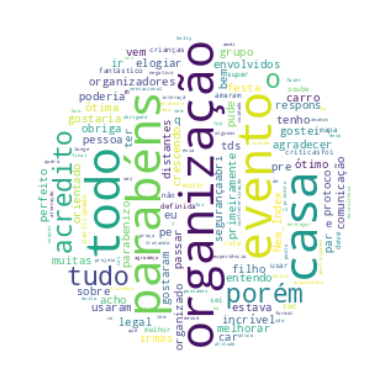

In [176]:
text = str(aux['Coment_Trat'])

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [186]:
aux['freq'] = aux['Coment_Trat'].apply(lambda x: FreqDist(x))
aux.head()

dic = {}
for i in range(1,len(aux)+1):
  dic = {**dic, **aux['freq'][i]}

for key, val in dic.items():
    dic[key] = sum(val)
dic
#freq=dic.most_common(20)
#freq

TypeError: 'int' object is not iterable

# ANÁLISE DE SENTIMENTO DOS COMENTÁRIOS